In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates,
    MOMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "MS", # values: MT, PA, MS, PI
	"training_date": "earlier", # values: earlier, current
	"mode": "ensemble", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_var", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
    "mask_out_non_biome": False
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
		# dates = [2019, 2020]

	else:
		dates = [2019, 2020]
		# dates = [2020, 2021]

	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
		# dates = [2017, 2018]

	else:
		dates = [2019, 2020]
		# dates = [2018, 2019]

	datasetClass = PIMultipleDates
	config['mask_out_non_biome'] = True
elif config['site'] == 'MO':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MOMultipleDates

else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 1; repetition_id = 7
			exp = 20; repetition_id = 0
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			# exp = 5; repetition_id = 0		
			# exp = 24; repetition_id = 0	
			exp = 30; repetition_id = 0	# L1C
	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 7; repetition_id = 0	
			## exp = 18; repetition_id = 0	
			exp = 27; repetition_id = 0
			exp = 28; repetition_id = 0 # L1C
	elif type(dataset) == MOMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 7; repetition_id = 0	
			exp = 19; repetition_id = 0	

else:

	exp = 30
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'MS', 'training_date': 'earlier', 'mode': 'ensemble', 'uncertainty_method': 'pred_var', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'mask_out_non_biome': False, 'inference_times': 10, 'training_times': 10}


ic| dataset.py:465 in __init__()- list(self.date_ids): [0]
ic| dataset.py:486 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 9
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [8]:
'''
import src.Logger as lg
importlib.reload(lg)
logger = Logger()
manager.logger = logger
'''

'\nimport src.Logger as lg\nimportlib.reload(lg)\nlogger = Logger()\nmanager.logger = logger\n'

In [9]:
dates

[2018, 2019]

In [10]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'MS',
 'training_date': 'earlier',
 'mode': 'ensemble',
 'uncertainty_method': 'pred_var',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'mask_out_non_biome': False,
 'inference_times': 10,
 'training_times': 10,
 'dropout_training': False}

In [11]:
exp

30

In [12]:
manager.setExperimentPath()
manager.createLogFolders()

In [13]:
# ic(type(dataset), exp, dataset.dates)


In [14]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:563 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:566 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:570 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:574 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:576 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:555 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


Removing bufer................
Mask label shape:  
 (18605, 19481, 1) 
 Unique values:  
 [0 1 2]


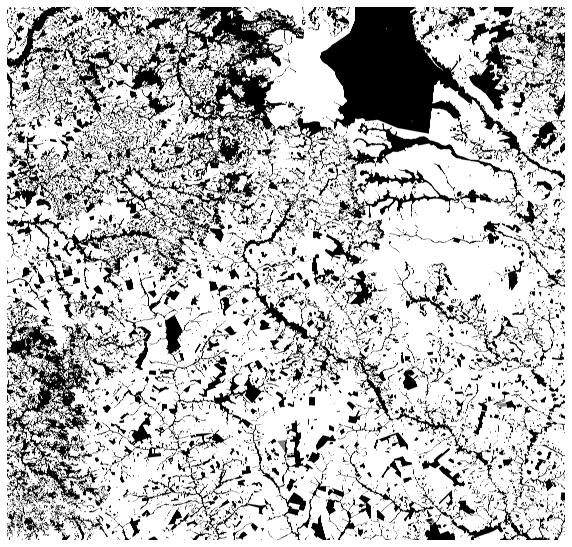

In [15]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [16]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3721 3896
Mask size:  (18605, 19480)


In [17]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [18]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([4990671,   98514, 9407831], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([5917079,   37440, 8542497], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([5041746,   10700, 9444570], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([11587034,     7842,  2902140], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([5114752,   19905, 9362359], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([ 4163780,     4735, 10328501], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([4706215,    1458, 9789343], dtype=int64))
Set 8 (array([0, 1, 2], dtype=uint8), array([ 3840520,     4559, 10651937], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([ 4370769,     4428, 10121819], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([ 3007958,     6872, 11482186], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([ 3478023,    45487, 10973506], dtype=int64))
Set 12 (array([0, 1, 2]

In [19]:

manager.label_mask.dtype

dtype('uint8')

In [20]:

manager.getLabelCurrentDeforestation()

In [21]:

manager.loadInputImage()

ic| dataset.py:506 in loadInputImage()
    image_stack.shape: (18605, 19481, 9)


Image shape:  (18605, 19481, 9)
mask:  (18605, 19480)
image stack:  (18605, 19480, 9)
ref : (18605, 19480, 1)


In [22]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
        0.2777778 , 0.33333334, 0.3888889 , 0.5       , 0.6111111 ,
        0.7222222 , 0.8333333 , 0.9444445 , 1.        ], dtype=float32),
 array([100222626,    316161,    440417,    310884,    701575,    318766,
           903906,   1003651,   1305903,   2096238,   3824633,   6540581,
          8716969, 235723090], dtype=int64))

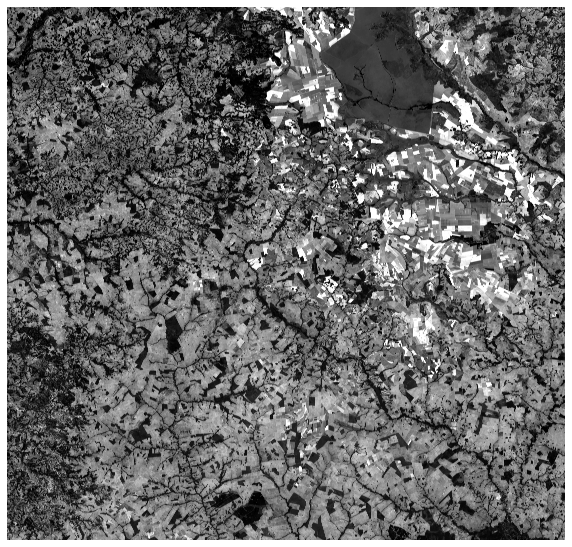

In [23]:

manager.logger.plotFigure(manager.image_stack[...,1], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

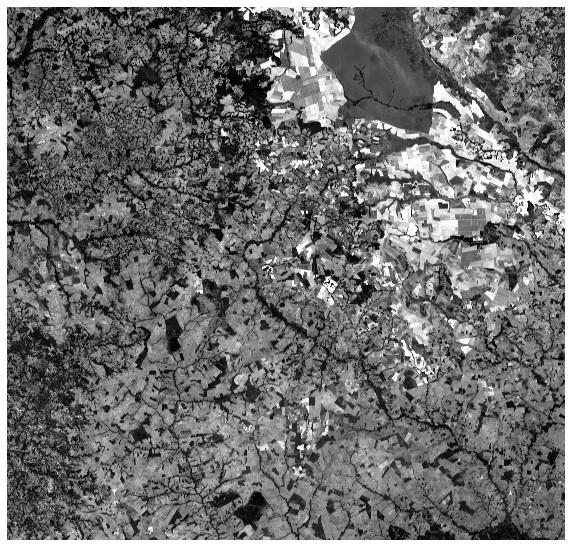

In [24]:

manager.logger.plotFigure(manager.image_stack[...,5], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [25]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([ 99618511,    473296, 262333593], dtype=int64))

In [26]:
# manager.maskNoDataAsNotConsideredClass()

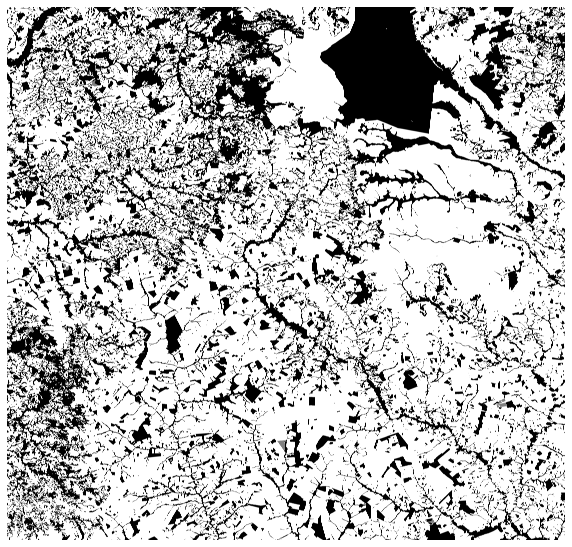

In [27]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [28]:

manager.getImageChannels()

ic| base.py:111 in getImageChannels()
    self.image_stack.shape: (18605, 19480, 9)
ic| base.py:113 in getImageChannels()- self.channels: 9


In [29]:

manager.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


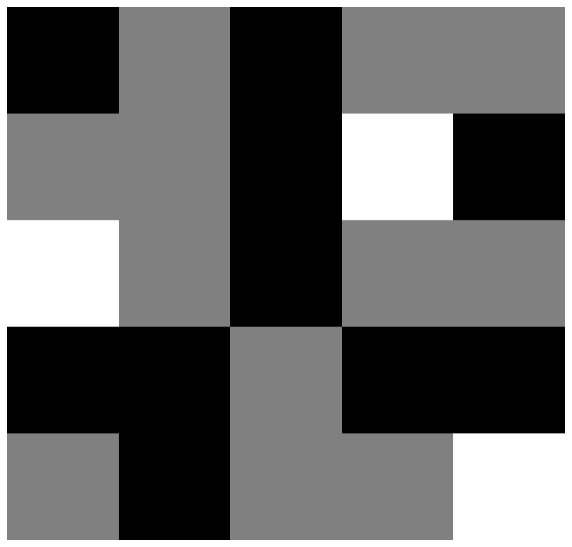

In [30]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [31]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [32]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([ 51901932,    179423, 121882837], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([10781812,    54041, 32655195], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([ 36934767,    239832, 107795561], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([ 99618511,    473296, 262333593], dtype=int64))


In [33]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.2983 0.001  0.7006]
val unique [0.2479 0.0012 0.7508]
test unique [0.2548 0.0017 0.7436]


In [34]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (18605, 19480, 1)
    im_idx_col.shape: (18605, 19480, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (18605, 19480, 2)
    im_idx.dtype: dtype('uint16')


In [35]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (487, 510, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (248370, 2)
    coords.dtype: dtype('uint16')


In [36]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:129 in trainTestSplit()
    self.coords_train.shape: (115271, 3)
    self.coords_val.shape: (28310, 3)


In [37]:
if config["training"] == True:
    manager.label_mask.shape

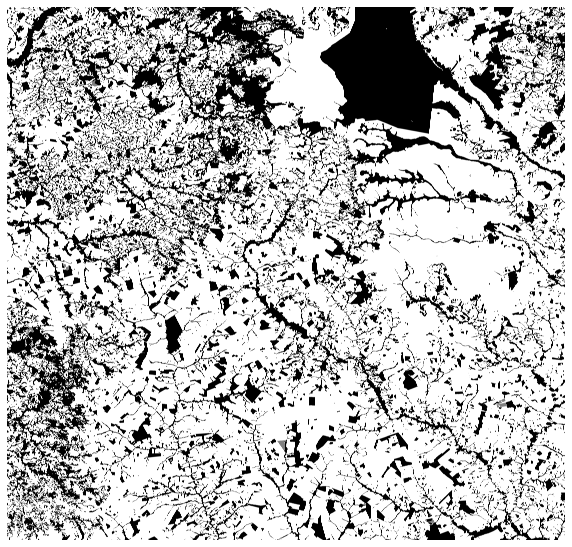

In [38]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [39]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [40]:
if config["training"] == True:
    print(manager.coords_train)

[[    0  3914     0]
 [    0  3952     0]
 [    0  3990     0]
 ...
 [18468 15352     0]
 [18468 15390     0]
 [18468 15428     0]]


In [41]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (1539, 3) validation samples:  (328, 3)


In [42]:
if config["training"] == True:
    inputSnipShow = True

In [43]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [44]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [46]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [47]:
manager.dataset.bands

4

In [48]:
manager.dataset.previewBandsSnip

[[1, 2, 3], [5, 6, 7]]

ic| Logger.py:40 in snipDataset()
    

[15086   494     0]
coord [15086   494     0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.1163898
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23059493
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


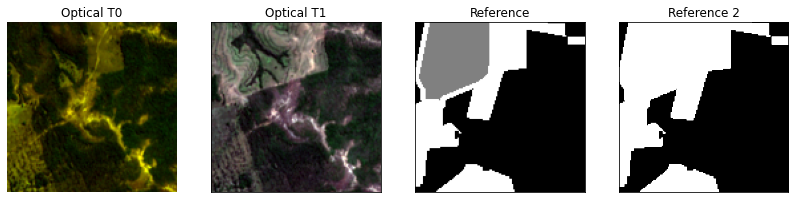

In [49]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:40 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.2526685
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.38989505


[  874 19000     0]
coord [  874 19000     0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


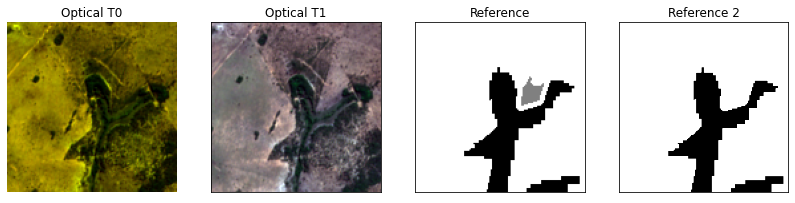

In [50]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:40 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09660873
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.21401238


[3382 6992    0]
coord [3382 6992    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


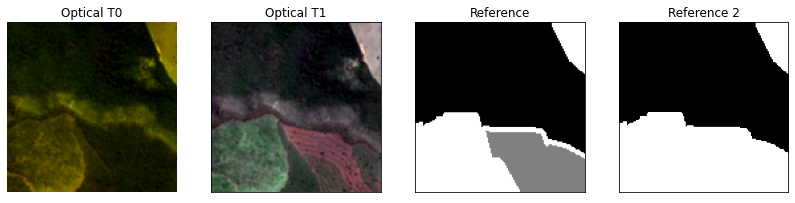

In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:40 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.17137887
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.29270032


[2888 6422    0]
coord [2888 6422    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


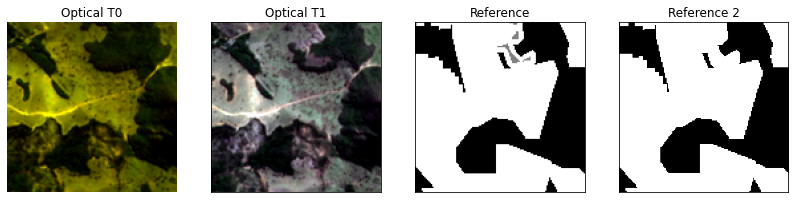

In [52]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:40 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.17137887
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.29270032


[2888 6422    0]
coord [2888 6422    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


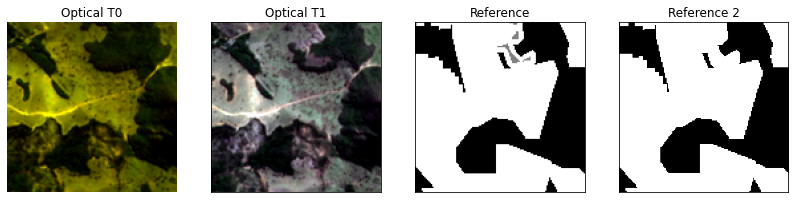

In [53]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [54]:
if config["training"] == True:
    manager.getGenerators()


In [55]:
if config["training"] == True:
    manager.fixChannelNumber()

In [56]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/MS/exp30


In [57]:
if config["training"] == True:
    print(manager.channels)

9


In [58]:
if config["training"] == True:
    print(manager.image_stack.shape)

(18605, 19480, 9)


In [59]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 10


In [60]:
manager.class_n

3

In [61]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 9) 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 1312        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


K.int_shape(y_pred) (None, 128, 128, 3)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(weights) (3,)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(loss) (None, 128, 128)
K.int_shape(y_pred) (None, 128, 128, 3)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(weights) (3,)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(loss) (None, 128, 128)
143/144 [============================>.] - ETA: 0s - loss: 0.1054 - accuracy: 0.5179K.int_shape(y_pred) (None, 128, 128, 3)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(weights) (3,)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(loss) (None, 128, 128)
144/144 [==============================] - 13s 54ms/step - loss: 0.1051 - accuracy: 0.5185 - val_loss: 0.0868 - val_accuracy: 0.5805

Epoch 00001: val_loss improved from inf to 0.08681, saving model to D:/Jorge/datasets/deforestation/experiments/MS/e

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


144/144 [==============================] - 7s 45ms/step - loss: 0.0562 - accuracy: 0.7537 - val_loss: 0.0520 - val_accuracy: 0.8488

Epoch 00002: val_loss improved from 0.08681 to 0.05196, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp30/models\resunet_0.h5
Epoch 3/100
144/144 [==============================] - 7s 45ms/step - loss: 0.0396 - accuracy: 0.8760 - val_loss: 0.0422 - val_accuracy: 0.8935

Epoch 00003: val_loss improved from 0.05196 to 0.04224, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp30/models\resunet_0.h5
Epoch 4/100
144/144 [==============================] - 6s 45ms/step - loss: 0.0345 - accuracy: 0.9000 - val_loss: 0.0397 - val_accuracy: 0.9061

Epoch 00004: val_loss improved from 0.04224 to 0.03967, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp30/models\resunet_0.h5
Epoch 5/100
144/144 [==============================] - 6s 45ms/step - loss: 0.0312 - accuracy: 0.9137 - val_loss: 0.0354 - val_accuracy: 0.925

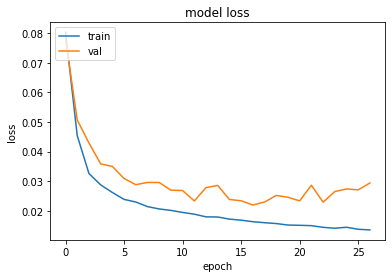

In [62]:
if config["training"] == True:
    manager.plotHistory()


In [63]:
repetition_id = 0

In [64]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [65]:
manager.image_stack.shape

(18605, 19480, 9)

In [66]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [67]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [68]:
manager.image_stack.shape

(18605, 19480, 9)

In [69]:
manager.setPadding()

-35.0 -8.0


In [70]:
import src.network as network
from tensorflow.keras.models import Model, load_model, Sequential
'''
def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', compile=False)
    
    if self.classes_mode == False:
        class_n = 3
        self.patchesHandler.class_n = class_n
    else:
        class_n = 2    
        self.patchesHandler.class_n = class_n + 1
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = network.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = class_n, dropout_seed = None, training=self.config['dropout_training'])

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        

        metrics_all =[]
        with tf.device('/cpu:0'):
            for tm in range(0,self.config["inference_times"]):

                print('time: ', tm)

                
                # Recinstructing predicted map
                start_test = time.time()
                
                prob_reconstructed = self.patchesHandler.infer(
                        new_model, self.image1_pad, self.h, self.w, 
                        num_patches_x, num_patches_y, patch_size_rows, 
                        patch_size_cols, classes_mode = self.classes_mode)
                        
                ts_time =  time.time() - start_test

                if self.config["save_probabilities"] == True:
                    np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
                else:
                    self.prob_rec[...,tm] = prob_reconstructed
                
                metrics_all.append(ts_time)
                del prob_reconstructed
            metrics_ = np.asarray(metrics_all)
            # Saving test time
            np.save(self.path_exp+'/metrics_ts.npy', metrics_)
    del self.image1_pad
'''

'\ndef infer(self):\n\n    self.h, self.w, self.c = self.image1_pad.shape\n    self.c = self.channels\n    patch_size_rows = self.h//self.n_rows\n    patch_size_cols = self.w//self.n_cols\n    num_patches_x = int(self.h/patch_size_rows)\n    num_patches_y = int(self.w/patch_size_cols)\n\n    ic(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\')\n    model = load_model(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\', compile=False)\n    \n    if self.classes_mode == False:\n        class_n = 3\n        self.patchesHandler.class_n = class_n\n    else:\n        class_n = 2    \n        self.patchesHandler.class_n = class_n + 1\n    if self.config["loadInference"] == False:\n        if self.config["save_probabilities"] == False:\n            if self.classes_mode == False:\n                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)\n            else:

In [71]:
'''
import types

manager.infer = types.MethodType(infer, manager)
'''


'\nimport types\n\nmanager.infer = types.MethodType(infer, manager)\n'

In [72]:
manager.infer()

time:  0
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_0.h5
time:  1
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_1.h5
time:  2
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_2.h5
time:  3
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_3.h5
time:  4
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_4.h5
time:  5
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_5.h5
time:  6
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_6.h5
time:  7
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_7.h5
time:  8
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_8.h5
time:  9
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_9.h5


In [73]:
manager.loadPredictedProbabilities()

In [74]:
manager.prob_rec.shape

(18640, 19488, 10)

In [75]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [76]:
manager.prob_rec.shape

(18640, 19488, 10)

In [77]:
manager.getMeanProb()

In [78]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:121 in getStats()
    np.min(value): 2.7866997e-12
    np.mean(value): 0.0029387134
    np.max(value): 1.0


In [79]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (18640, 19488)


(18640, 19488)

In [80]:
manager.unpadMeanProb()

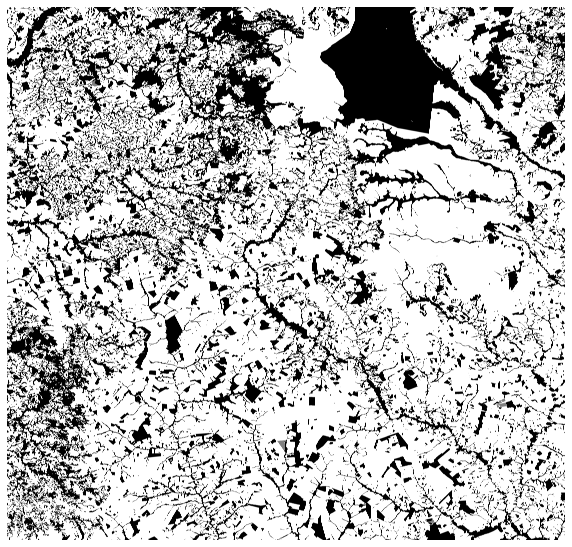

In [81]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [82]:
manager.squeezeLabel()

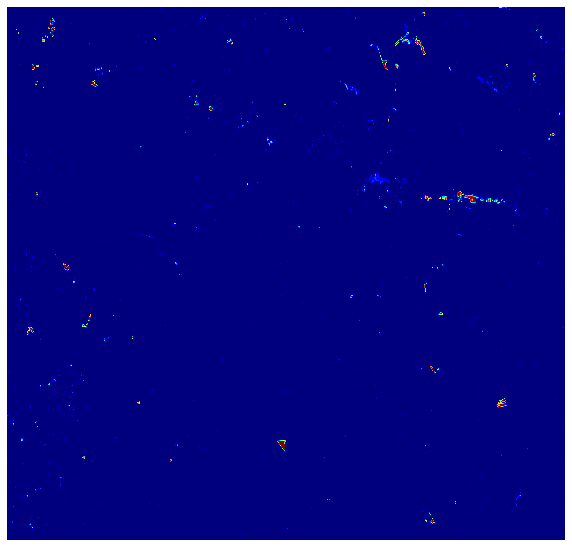

In [83]:
manager.setMeanProbNotConsideredAreas()
manager.logger.plotFigure(manager.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [84]:
print(manager.label_mask.shape)

(18605, 19480)


In [85]:
# manager.getLabelTest()

In [86]:
# manager.getMAP()

In [87]:
manager.prob_rec.shape

(18640, 19488, 10)

In [88]:
manager.preprocessProbRec()
print(manager.prob_rec.shape)

(10, 18640, 19488, 1)


In [89]:
manager.prob_rec.shape

(10, 18640, 19488, 1)

In [90]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:121 in getStats()
    np.min(value): 6.1453825e-29
    np.mean(value): 0.0029370289
    np.max(value): 1.0


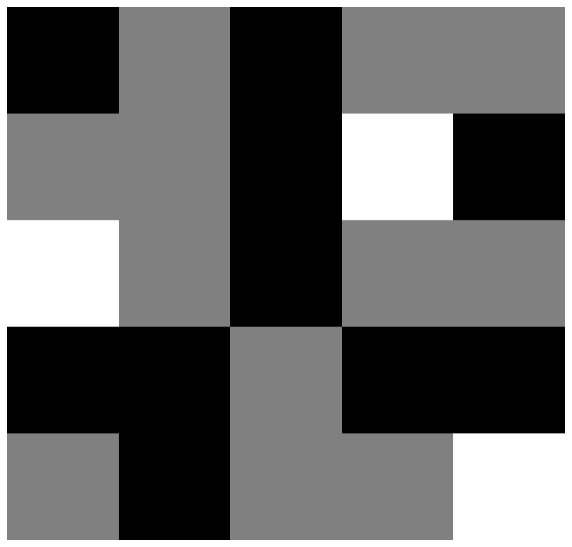

In [91]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [92]:
manager.getLabelCurrentDeforestation()

In [93]:
manager.applyProbabilityThreshold()

(18605, 19480)
(array([0., 1.], dtype=float32), array([361645951,    779449], dtype=int64))


ic| base.py:413 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (18605, 19480)
    self.predicted.shape: (18605, 19480)


In [94]:
manager.getTestValues()

ic| base.py:436 in getTestValues()- predicted_test.shape: (144970160,)
ic| base.py:445 in getTestValues()- predicted_test.shape: (37174599,)


In [95]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([361645951,    779449], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([361693668,    731732], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([362377683,     47717], dtype=int64))


In [96]:
manager.calculateMetrics()

ic| base.py:489 in calculateMetrics()
    self.f1: 71.56
    self.precision: 59.43
    self.recall: 89.91


In [97]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| base.py:418 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (43491048,)
ic| base.py:424 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (10827637,)
ic| base.py:500 in calculateMetricsValidation()
    f1_val: 63.74
    precision_val: 50.19
    recall_val: 87.33
    mAP_val: 80.88


In [98]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [99]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:563 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:566 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:570 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:574 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:576 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:555 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


In [100]:
manager.getErrorMask()

(array([0., 1.], dtype=float32), array([362046362,    379038], dtype=int64))


In [101]:
manager.getErrorMaskToShowRGB()

[0. 1.]


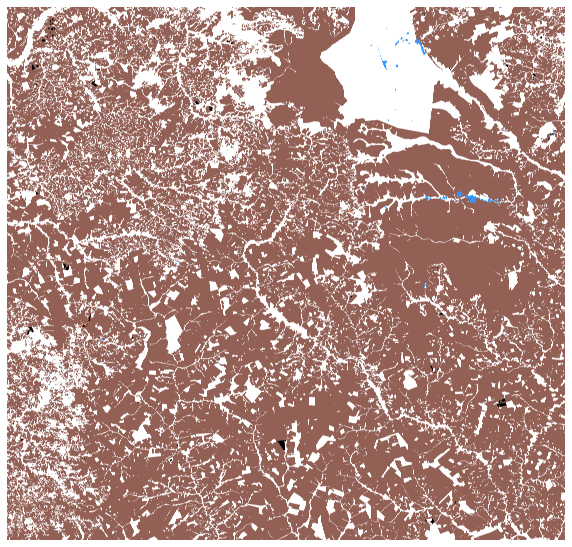

In [102]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [103]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [104]:
# manager.config['uncertainty_method'] = "pred_entropy"

In [105]:
manager.setUncertainty()

In [106]:
# manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [107]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:121 in getStats()
    np.min(value): 2.3188598e-23
    np.mean(value): 0.00021116622
    np.max(value): 0.23221616


In [108]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:121 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.00020209004
    np.max(value): 0.23221616


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (18605, 19480)


(18605, 19480)

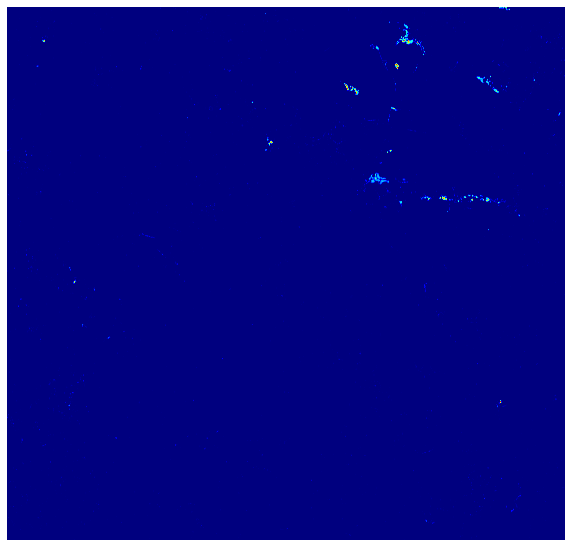

In [109]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



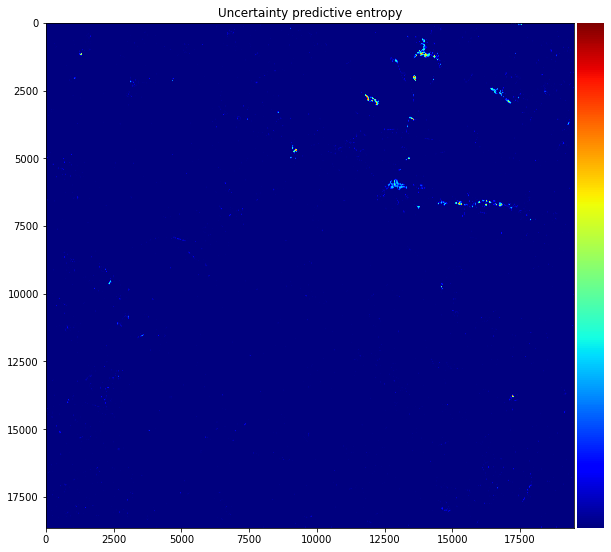

In [110]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

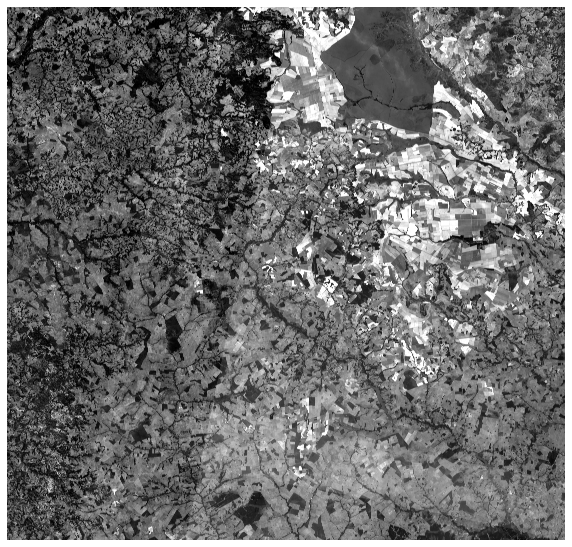

In [111]:

manager.logger.plotFigure(manager.image_stack[...,7], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [112]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:540 in getTestValues2()
    self.label_mask.shape: (18605, 19480)
ic| base.py:541 in getTestValues2()
    self.mask_amazon_ts.shape: (18605, 19480)
ic| base.py:545 in getTestValues2()
    self.label_mask_test.shape: (144970160,)
ic| base.py:553 in getTestValues2()
    self.error_mask_test.shape: (37153478,)


In [113]:
manager.dataset.previewLims1 = np.array([ 5500,  8500, 10000, 12500])

ic| Logger.py:165 in plotCropSample()
    manager.dataset.previewLims1: array([ 5500,  8500, 10000, 12500])
    manager.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([0, 1], dtype=uint8)
ic| Logger.py:169 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


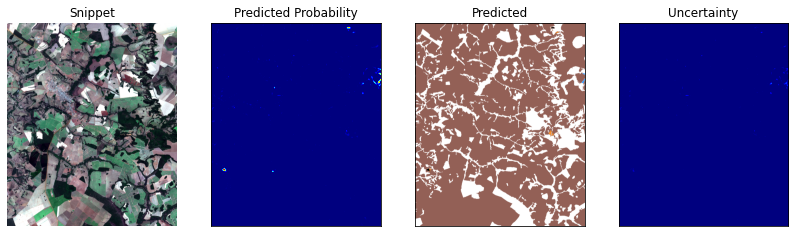

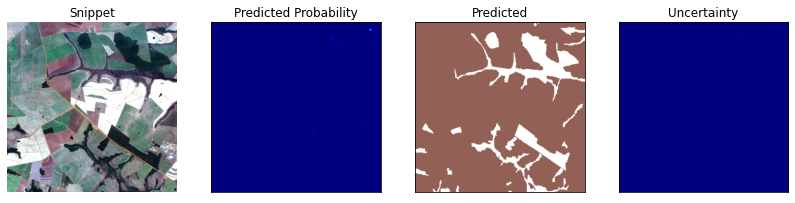

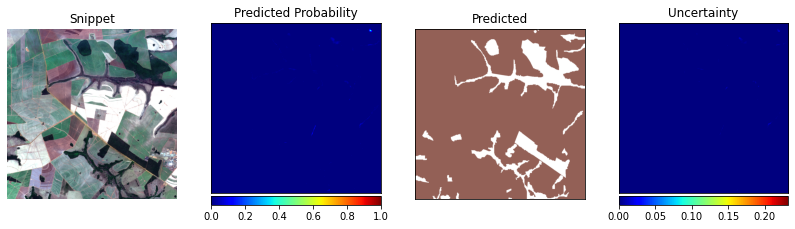

In [114]:
manager.logger.plotCropSample(manager)

In [115]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [116]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [117]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

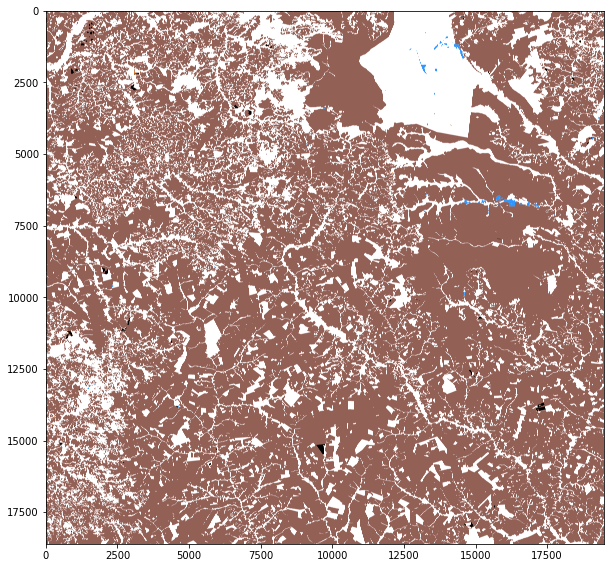

In [118]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.error_mask_to_show_rgb[...,::-1])


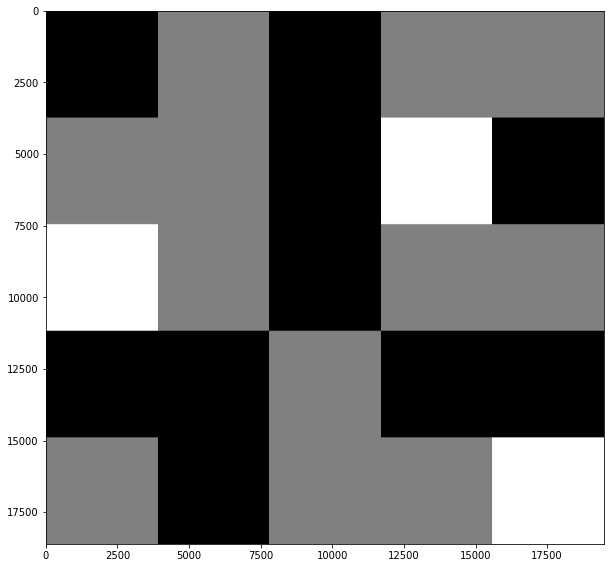

In [119]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.mask_tr_val, cmap='gray')

In [120]:
manager.dataset.previewLims1 = np.array([230, 500, 2230, 2500])
manager.dataset.previewLims2 = np.array([12500, 15000, 15000, 17500])
manager.dataset.previewLims2 = np.array([4000, 5000, 18000, None])
manager.dataset.previewLims2 = np.array([3000, 7000, 16000, None])


# PI
manager.dataset.previewLims2 = np.array([5000, 7500, 12500, 15000])
manager.dataset.previewLims1 = np.array([17000, 18000, 5000, 7500])
manager.dataset.previewLims2 = np.array([5000, 7500, 10000, 12500])

# MA

manager.dataset.previewLims1 = np.array([17000, 18000, 6000, 7000])
manager.dataset.previewLims2 = np.array([12500, 15000, 2000, 3000])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


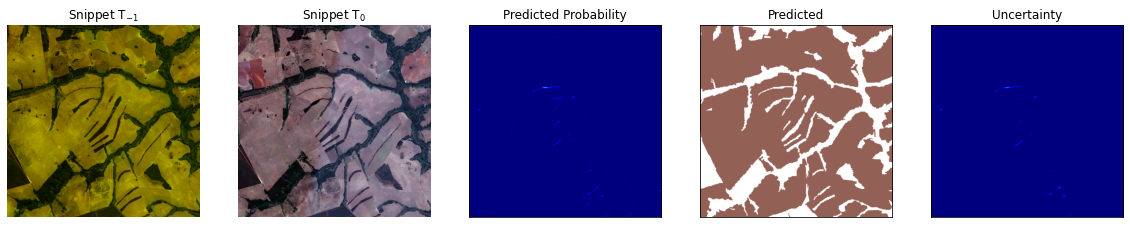

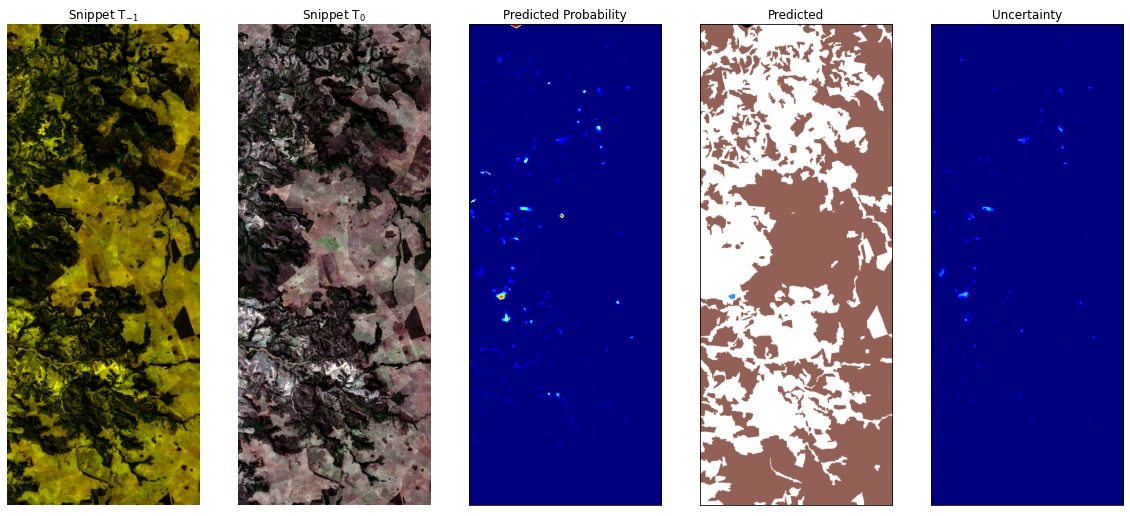

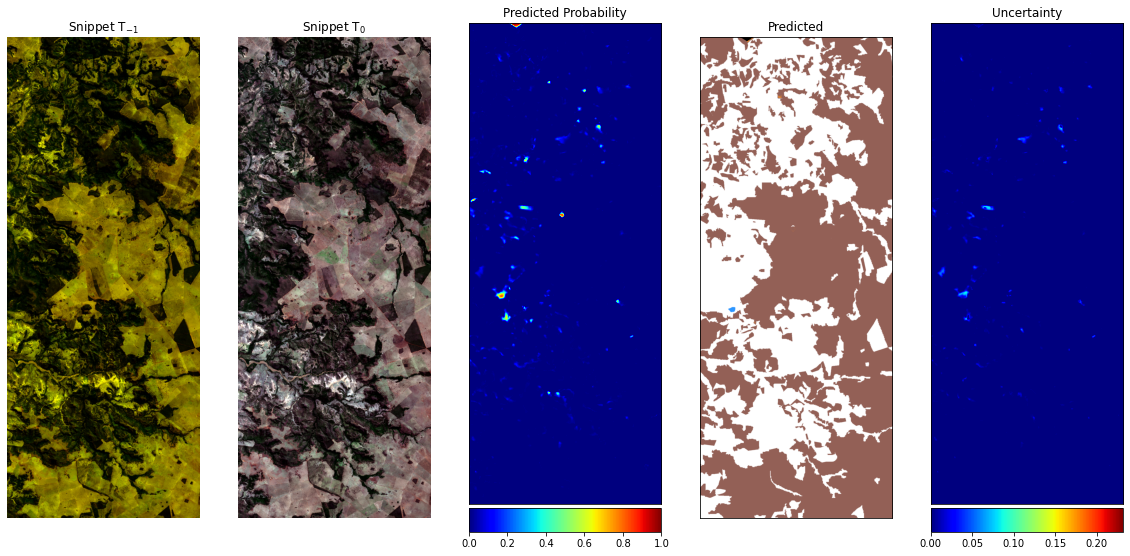

In [121]:
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims1, save_name='1')
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims2, save_name='2')
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims2, colorbar=True, save_name='Colorbar')

In [122]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:121 in getStats()
    np.min(value): 2.3188598e-23
    np.mean(value): 0.00046723717
    np.max(value): 0.23221616


In [123]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [124]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [125]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [126]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [127]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
            self.threshold_list = np.linspace(np.min(self.uncertainty) + 0.000015, np.max(self.uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [128]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [129]:

manager.getUncertaintyAAValues()

ic| 1409948429.py:63 in getUncertaintyAAValues()
    self.uncertainty.shape: (37153478,)
    self.label_mask_current_deforestation_test.shape: (37153478,)


[1.50000000e-05 1.28317314e-02 2.56484627e-02 3.84651941e-02
 5.12819254e-02 6.40986568e-02 7.69153882e-02 8.97321195e-02
 1.02548851e-01 1.15365582e-01 1.28182314e-01 1.40999045e-01
 1.53815776e-01 1.66632508e-01 1.79449239e-01 1.92265970e-01
 2.05082702e-01 2.17899433e-01 2.30716164e-01]
threshold 1.5e-05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3489215,)
    predicted_test_classified_incorrect.shape: (3489215,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3489215
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3489215
    len(label_mask_current_deforestation_test): 37153478


[0.77883229 0.99150408 0.40014473 0.09391355 0.49936414 0.83659291
 0.03946063]
threshold 0.01283173135942883


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (285329,)
    predicted_test_classified_incorrect.shape: (285329,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 285329
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 285329
    len(label_mask_current_deforestation_test): 37153478


[0.65541195 0.92716829 0.79817881 0.00767974 0.34196816 0.72549384
 0.1358011 ]
threshold 0.02564846271885766


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (182283,)
    predicted_test_classified_incorrect.shape: (182283,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 182283
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 182283
    len(label_mask_current_deforestation_test): 37153478


[0.64516118 0.91771161 0.84076655 0.00490622 0.27810857 0.69586437
 0.13374726]
threshold 0.03846519407828649


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (130402,)
    predicted_test_classified_incorrect.shape: (130402,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 130402
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 130402
    len(label_mask_current_deforestation_test): 37153478


[0.63617909 0.91353809 0.85853047 0.00350982 0.24824769 0.67393948
 0.12568661]
threshold 0.05128192543771532


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (98104,)
    predicted_test_classified_incorrect.shape: (98104,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 98104
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 98104
    len(label_mask_current_deforestation_test): 37153478


[0.63016526 0.91107076 0.86656817 0.00264051 0.23610113 0.66622575
 0.11971078]
threshold 0.06409865679714415


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (75549,)
    predicted_test_classified_incorrect.shape: (75549,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 75549
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 75549
    len(label_mask_current_deforestation_test): 37153478


[0.62483948 0.90920851 0.8719051  0.00203343 0.23139769 0.66309711
 0.1113136 ]
threshold 0.07691538815657298


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (57313,)
    predicted_test_classified_incorrect.shape: (57313,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 57313
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 57313
    len(label_mask_current_deforestation_test): 37153478


[0.62026894 0.90813277 0.87702665 0.0015426  0.2230003  0.64474346
 0.10213814]
threshold 0.08973211951600181


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (40666,)
    predicted_test_classified_incorrect.shape: (40666,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 40666
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 40666
    len(label_mask_current_deforestation_test): 37153478


[0.61505598 0.90789876 0.88242819 0.00109454 0.21315355 0.59465684
 0.08930003]
threshold 0.10254885087543064


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (33053,)
    predicted_test_classified_incorrect.shape: (33053,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 33053
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 33053
    len(label_mask_current_deforestation_test): 37153478


[6.11812411e-01 9.07624562e-01 8.85172039e-01 8.89634074e-04
 2.10635944e-01 5.63468570e-01 7.93798887e-02]
threshold 0.11536558223485947


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (26414,)
    predicted_test_classified_incorrect.shape: (26414,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 26414
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 26414
    len(label_mask_current_deforestation_test): 37153478


[6.08412424e-01 9.07223122e-01 8.87480832e-01 7.10942862e-04
 2.14200714e-01 5.34441805e-01 6.80596584e-02]
threshold 0.12818231359428828


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (21182,)
    predicted_test_classified_incorrect.shape: (21182,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 21182
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 21182
    len(label_mask_current_deforestation_test): 37153478


[6.05516667e-01 9.07031501e-01 8.89414876e-01 5.70121591e-04
 2.19738383e-01 4.99223775e-01 5.79591329e-02]
threshold 0.14099904495371712


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (16485,)
    predicted_test_classified_incorrect.shape: (16485,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 16485
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 16485
    len(label_mask_current_deforestation_test): 37153478


[6.03195106e-01 9.06590180e-01 8.91094781e-01 4.43700049e-04
 2.24622812e-01 4.69002016e-01 4.90600325e-02]
threshold 0.15381577631314594


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (11837,)
    predicted_test_classified_incorrect.shape: (11837,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 11837
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 11837
    len(label_mask_current_deforestation_test): 37153478


[5.99500580e-01 9.05815128e-01 8.92451627e-01 3.18597360e-04
 2.73822175e-01 4.51386861e-01 3.48035135e-02]
threshold 0.1666325076725748


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (8752,)
    predicted_test_classified_incorrect.shape: (8752,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8752
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8752
    len(label_mask_current_deforestation_test): 37153478


[5.97709194e-01 9.04921993e-01 8.93937697e-01 2.35563411e-04
 2.97793206e-01 4.26188786e-01 2.61340006e-02]
threshold 0.1794492390320036


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (5320,)
    predicted_test_classified_incorrect.shape: (5320,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5320
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5320
    len(label_mask_current_deforestation_test): 37153478


[5.95280381e-01 9.03698550e-01 8.95130860e-01 1.43189825e-04
 4.29567643e-01 4.19809178e-01 1.48384306e-02]
threshold 0.19226597039143245


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2520,)
    predicted_test_classified_incorrect.shape: (2520,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2520
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2520
    len(label_mask_current_deforestation_test): 37153478


[5.94267232e-01 9.02162090e-01 8.96694464e-01 6.78267590e-05
 5.93650794e-01 3.98720682e-01 7.35535955e-03]
threshold 0.20508270175086127


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1117,)
    predicted_test_classified_incorrect.shape: (1117,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1117
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1117
    len(label_mask_current_deforestation_test): 37153478


[5.94243948e-01 9.00646092e-01 8.98279605e-01 3.00644801e-05
 6.18589744e-01 3.16393443e-01 3.21890989e-03]
threshold 0.21789943311029009


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (373,)
    predicted_test_classified_incorrect.shape: (373,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 373
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 373
    len(label_mask_current_deforestation_test): 37153478


[5.94273510e-01 8.99969813e-01 8.98938645e-01 1.00394370e-05
 5.55555556e-01 1.50375940e-01 1.55374887e-03]
threshold 0.23071616446971893


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (25,)
    predicted_test_classified_incorrect.shape: (25,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 25
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 25
    len(label_mask_current_deforestation_test): 37153478


[5.94265574e-01 8.99207775e-01 8.99110943e-01 6.72884514e-07
            nan 0.00000000e+00 1.50661404e-04]


In [130]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:682 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (37153478,)
    self.label_mask_current_deforestation_test.shape: (37153478,)


threshold 1.5e-05
(37153478,) (37153478,)
cm_audited [[36894942    26380]
 [     796   231360]]
[0.89764879 0.99657127]
threshold 0.01283173135942883
(37153478,) (37153478,)
cm_audited [[36823898    97424]
 [   14556   217600]]
[0.69074102 0.93730078]
threshold 0.02564846271885766
(37153478,) (37153478,)
cm_audited [[36813968   107354]
 [   17502   214654]]
[0.66661077 0.92461104]
threshold 0.03846519407828649
(37153478,) (37153478,)
cm_audited [[36807338   113984]
 [   18864   213292]]
[0.65171904 0.91874429]
threshold 0.05128192543771532
(37153478,) (37153478,)
cm_audited [[36803253   118069]
 [   19637   212519]]
[0.64285153 0.91541463]
threshold 0.06409865679714415
(37153478,) (37153478,)
cm_audited [[36799788   121534]
 [   20213   211943]]
[0.63555508 0.91293354]
threshold 0.07691538815657298
(37153478,) (37153478,)
cm_audited [[36796673   124649]
 [   20597   211559]]
[0.62925035 0.91127948]
threshold 0.08973211951600181
(37153478,) (37153478,)
cm_audited [[36793106   128216]
 [

ic| base.py:688 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.89764879, 0.99657127],
                                  [0.69074102, 0.93730078],
                                  [0.66661077, 0.92461104],
                                  [0.65171904, 0.91874429],
                                  [0.64285153, 0.91541463],
                                  [0.63555508, 0.91293354],
                                  [0.62925035, 0.91127948],
                                  [0.62243882, 0.91048261],
                                  [0.61833813, 0.90990972],
                                  [0.61416842, 0.90924206],
                                  [0.61066475, 0.90883716],
                                  [0.60773355, 0.90818674],
                                  [0.60343069, 0.90720464],
                                  [0.60094791, 0.90607609],
                                  [0.59781609, 0.90461155],
                                  [0.59589035, 0.

cm_audited [[36778809   142513]
 [   23397   208759]]
[0.59429445 0.89921863]


In [131]:
manager.setPlotLimsForUncertaintyAA()

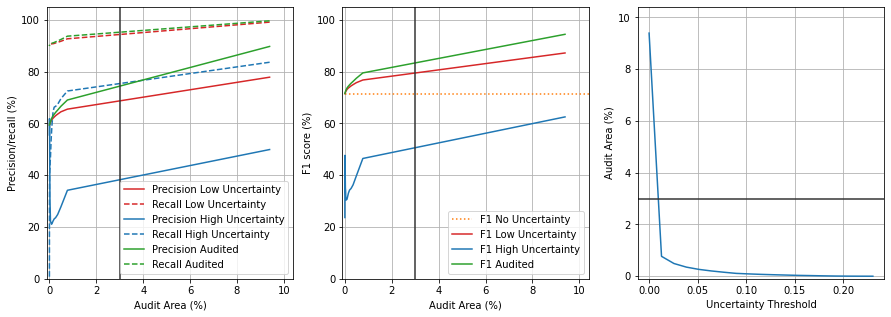

In [132]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [133]:
from scipy import optimize  


In [134]:
manager.getOptimalUncertaintyThreshold(bounds=(np.min(manager.uncertainty) + 0.000015, np.max(manager.uncertainty) - 0.0015))

ic| base.py:791 in getOptimalUncertaintyThreshold()
    bounds: (1.5e-05, 0.23071616446971893)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.08813500358325302
threshold 0.08813500358325302


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (42149,)
    predicted_test_classified_incorrect.shape: (42149,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 42149
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 42149
    len(label_mask_current_deforestation_test): 37153478


[0.61603044 0.90792892 0.88210944 0.00113446 0.20975713 0.59784914
 0.09196627]
0.1425961608864659
threshold 0.1425961608864659


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (16002,)
    predicted_test_classified_incorrect.shape: (16002,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 16002
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 16002
    len(label_mask_current_deforestation_test): 37153478


[6.02871720e-01 9.06542179e-01 8.91258464e-01 4.30699920e-04
 2.26797711e-01 4.65763924e-01 4.78370798e-02]
0.054476157303212897
threshold 0.054476157303212897


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (91765,)
    predicted_test_classified_incorrect.shape: (91765,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 91765
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 91765
    len(label_mask_current_deforestation_test): 37153478


[0.62885559 0.91055041 0.86800686 0.00246989 0.23442522 0.66571402
 0.11804314]
0.03367384628004014
threshold 0.03367384628004014


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (146758,)
    predicted_test_classified_incorrect.shape: (146758,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 146758
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 146758
    len(label_mask_current_deforestation_test): 37153478


[0.63897129 0.91484814 0.85359844 0.00395005 0.25701151 0.67979155
 0.12815915]
0.020817311023172767
threshold 0.020817311023172767


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (210965,)
    predicted_test_classified_incorrect.shape: (210965,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 210965
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 210965
    len(label_mask_current_deforestation_test): 37153478


[0.64881933 0.92018553 0.82978256 0.0056782  0.29619065 0.70567345
 0.13543932]
0.012871535256867373
threshold 0.012871535256867373


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (284849,)
    predicted_test_classified_incorrect.shape: (284849,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 284849
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 284849
    len(label_mask_current_deforestation_test): 37153478


[0.65539542 0.92712731 0.79840711 0.00766682 0.34163342 0.72533507
 0.13582798]
0.007960775766305397
threshold 0.007960775766305397


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (370354,)
    predicted_test_classified_incorrect.shape: (370354,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 370354
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 370354
    len(label_mask_current_deforestation_test): 37153478


[0.65874519 0.9362762  0.75939455 0.00996822 0.38789763 0.73955175
 0.13217095]
0.004925759490561977
threshold 0.004925759490561977


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (467830,)
    predicted_test_classified_incorrect.shape: (467830,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 467830
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 467830
    len(label_mask_current_deforestation_test): 37153478


[0.66132142 0.94619545 0.71962387 0.01259182 0.42250365 0.74956378
 0.1259167 ]
0.003050016275743421
threshold 0.003050016275743421


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (578309,)
    predicted_test_classified_incorrect.shape: (578309,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 578309
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 578309
    len(label_mask_current_deforestation_test): 37153478


[0.66612667 0.95554088 0.68544858 0.01556541 0.44147672 0.75590131
 0.11837012]
0.0018907432148185573
threshold 0.0018907432148185573


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (700505,)
    predicted_test_classified_incorrect.shape: (700505,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 700505
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 700505
    len(label_mask_current_deforestation_test): 37153478


[0.67085475 0.9629367  0.65501645 0.01885436 0.45490158 0.76333904
 0.10944509]
0.001174273060924864
threshold 0.001174273060924864


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (837313,)
    predicted_test_classified_incorrect.shape: (837313,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 837313
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 837313
    len(label_mask_current_deforestation_test): 37153478


[0.67618535 0.96846685 0.62799583 0.0225366  0.46404347 0.77118457
 0.10019981]
0.0007314701538936937
threshold 0.0007314701538936937


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (992487,)
    predicted_test_classified_incorrect.shape: (992487,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 992487
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 992487
    len(label_mask_current_deforestation_test): 37153478


[0.68035065 0.97246302 0.60207791 0.02671317 0.47296296 0.77987379
 0.09067371]
0.0004578029070311706
threshold 0.0004578029070311706


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1172289,)
    predicted_test_classified_incorrect.shape: (1172289,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1172289
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1172289
    len(label_mask_current_deforestation_test): 37153478


[0.68522202 0.97651497 0.57868847 0.0315526  0.47935045 0.78651709
 0.08162388]
0.0002886672468625232
threshold 0.0002886672468625232


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1379997,)
    predicted_test_classified_incorrect.shape: (1379997,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1379997
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1379997
    len(label_mask_current_deforestation_test): 37153478


[0.68998236 0.9797071  0.55441169 0.03714314 0.48585965 0.79404644
 0.07319572]
0.0005590183354571348
threshold 0.0005590183354571348


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1092160,)
    predicted_test_classified_incorrect.shape: (1092160,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1092160
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1092160
    len(label_mask_current_deforestation_test): 37153478


[0.68331692 0.97498948 0.58872052 0.0293959  0.47648615 0.7834629
 0.08549294]
0.00059235167708205
threshold 0.00059235167708205


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1069848,)
    predicted_test_classified_incorrect.shape: (1069848,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1069848
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1069848
    len(label_mask_current_deforestation_test): 37153478


[0.68279974 0.97440591 0.59151605 0.02879537 0.47566077 0.78278981
 0.08664146]
0.0005256849938322196
threshold 0.0005256849938322196


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1116269,)
    predicted_test_classified_incorrect.shape: (1116269,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1116269
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1116269
    len(label_mask_current_deforestation_test): 37153478


[0.68404903 0.9755102  0.58577422 0.0300448  0.4771785  0.78428265
 0.08432086]
0.0004923516527017178
threshold 0.0004923516527017178


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1142342,)
    predicted_test_classified_incorrect.shape: (1142342,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1142342
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1142342
    len(label_mask_current_deforestation_test): 37153478
ic| base.py:795 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.0005256849938322196


[0.68470056 0.97601109 0.58253933 0.03074657 0.47807194 0.78525942
 0.08306187]


In [135]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.0005256849938322196
threshold 0.0005256849938322196


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1116269,)
    predicted_test_classified_incorrect.shape: (1116269,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1116269
    len(label_mask_current_deforestation_test): 37153478
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1116269
    len(label_mask_current_deforestation_test): 37153478


[0.68404903 0.9755102  0.58577422 0.0300448  0.4771785  0.78428265
 0.08432086]
threshold 0.0005256849938322196
(37153478,) (37153478,)


ic| base.py:826 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.0300448]),
                     'UEO': array([0.08432086]),
                     'f1': 71.56,
                     'f1_H': array([0.59334815]),
                     'f1_L': array([0.80418559]),
                     'precision_H': array([0.4771785]),
                     'precision_L': array([0.68404903]),
                     'recall_H': array([0.78428265]),
                     'recall_L': array([0.9755102]),
                     'recall_Ltotal': array([0.58577422])}
ic| base.py:827 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.87354452]),
                             'precision': array([0.78456135]),
                             'recall': array([0.98529437])}


cm_audited [[36858510    62812]
 [    3414   228742]]
[0.78456135 0.98529437]


{'metrics': {'precision_L': array([0.68404903]),
  'recall_L': array([0.9755102]),
  'recall_Ltotal': array([0.58577422]),
  'AA': array([0.0300448]),
  'precision_H': array([0.4771785]),
  'recall_H': array([0.78428265]),
  'UEO': array([0.08432086]),
  'f1_L': array([0.80418559]),
  'f1_H': array([0.59334815]),
  'f1': 71.56},
 'metrics_audited': {'precision': array([0.78456135]),
  'recall': array([0.98529437]),
  'f1': array([0.87354452])},
 'exp': 30}